MSSV: 19520954

Họ tên: Lê Thị Thanh Thanh

Bài tập: Cài đặt mô hình Neural Network bằng Tensorflow


# Các thư viện cần thiết

In [68]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Activation
from mlxtend.plotting import plot_decision_regions


# Sinh dữ liệu bằng sklearn.datasets.make_circles

In [98]:
X, y = make_circles(n_samples=1000, noise=0.13, factor=0.4, random_state= 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state= 0)

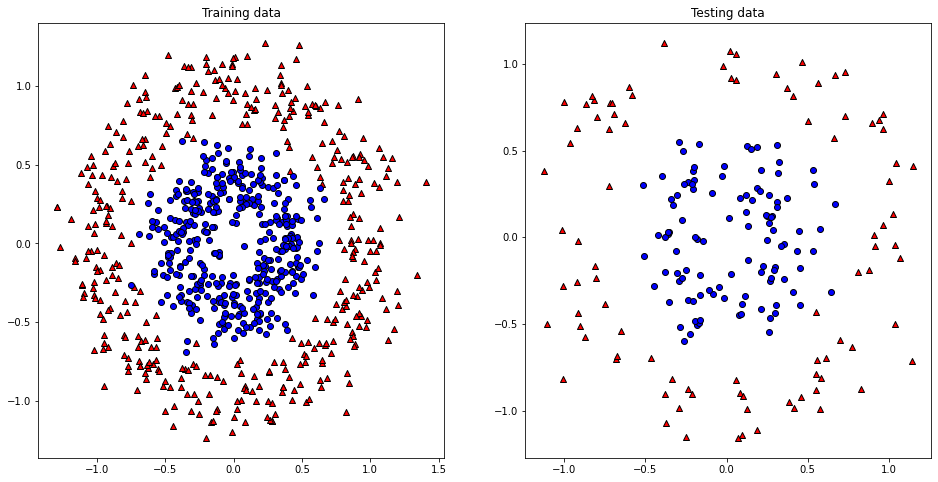

In [99]:
_, (train_ax, test_ax) = plt.subplots(ncols=2, figsize=(16, 8))
reds = y_train == 0
blues = y_train == 1
train_ax.scatter(X_train[reds, 0], X_train[reds, 1], c='red', edgecolors='k', marker= '^')
train_ax.scatter(X_train[blues, 0], X_train[blues, 1], c='blue', edgecolors='k')
train_ax.set_title("Training data")

reds = y_test == 0
blues = y_test == 1
test_ax.scatter(X_test[reds, 0], X_test[reds, 1], c='red', edgecolors='k', marker= '^')
test_ax.scatter(X_test[blues, 0], X_test[blues, 1], c='blue', edgecolors='k')
_ = test_ax.set_title("Testing data")

# Build model

In [100]:
model = tf.keras.Sequential()
model.add(Dense(128, input_dim=2, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Dense(2, kernel_initializer='he_normal'))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               384       
                                                                 
 activation_10 (Activation)  (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 activation_11 (Activation)  (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 2)                 130       
                                                                 
 activation_12 (Activation)  (None, 2)                 0         
                                                                 
Total params: 8,770
Trainable params: 8,770
Non-traina

In [101]:
model.compile(loss='categorical_crossentropy', 
              optimizer=SGD(learning_rate=0.01, decay=1e-6), metrics=['accuracy'])

In [102]:
history = model.fit(X_train, pd.get_dummies(y_train), validation_split=0.2, epochs=100, batch_size=128, verbose=1)

Epoch 1/100
5/5 [==============================] - 0s 41ms/step - loss: 0.7097 - accuracy: 0.4922 - val_loss: 0.6600 - val_accuracy: 0.4938
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 0.6675 - accuracy: 0.4969 - val_loss: 0.6392 - val_accuracy: 0.5063
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 0.6415 - accuracy: 0.4984 - val_loss: 0.6266 - val_accuracy: 0.5125
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 0.6254 - accuracy: 0.5234 - val_loss: 0.6176 - val_accuracy: 0.5250
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 0.6141 - accuracy: 0.5250 - val_loss: 0.6105 - val_accuracy: 0.5063
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 0.6054 - accuracy: 0.5156 - val_loss: 0.6042 - val_accuracy: 0.5125
Epoch 7/100
5/5 [==============================] - 0s 10ms/step - loss: 0.5985 - accuracy: 0.5188 - val_loss: 0.5985 - val_accuracy: 0.5188
Epoch 8/100
5/5 [========

## Biểu đồ

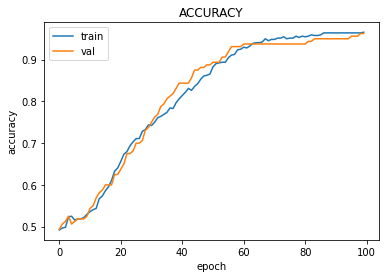

In [103]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ACCURACY')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

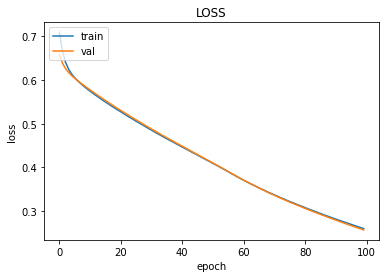

In [104]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LOSS')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Dự đoán trên tập test

In [105]:
y_predict = np.argmax(model.predict(X_test), axis=1)
print(len(y_predict))

200


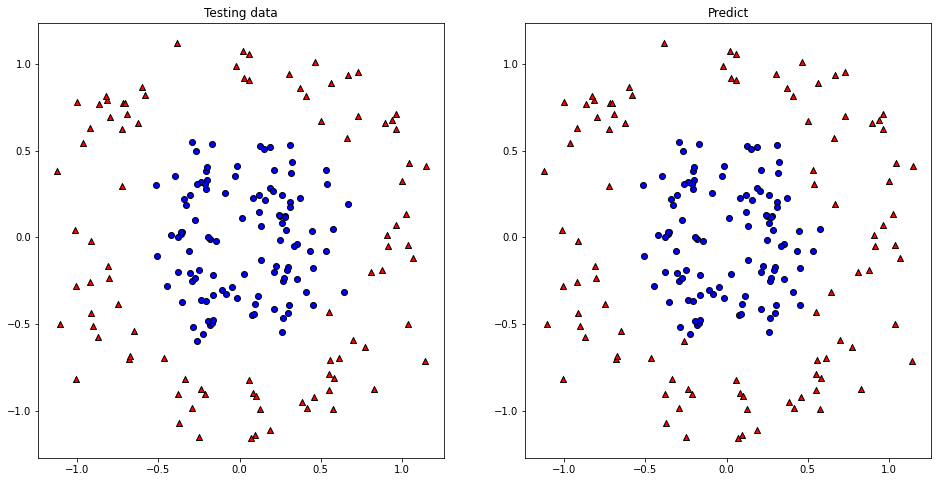

In [107]:
_, (test_ax, pred_ax) = plt.subplots(ncols=2, figsize=(16, 8))

reds = y_test == 0
blues = y_test == 1
test_ax.scatter(X_test[reds, 0], X_test[reds, 1], c='red', edgecolors='k', marker= '^')
test_ax.scatter(X_test[blues, 0], X_test[blues, 1], c='blue', edgecolors='k')


test_ax.set_title("Testing data")

red = y_predict == 0
blue = y_predict == 1
pred_ax.scatter(X_test[red, 0], X_test[red, 1], c='red', edgecolors='k', marker= '^')
pred_ax.scatter(X_test[blue, 0], X_test[blue, 1], c='blue', edgecolors='k')

_ = pred_ax.set_title("Predict")